In [1]:
import numpy
import math
import matplotlib.pyplot as plt

In [2]:
y = numpy.random.uniform(0,0.5);
x = numpy.random.uniform(0,0.5);
learningRate = 0.01;

In [3]:
#f(x, y) = −log(1 − x − y) − log x − log y
def getFrequencies(w0,w1,frequency_list):
    temp1 = (1 - w0 - w1);    
    temp = -math.log10(temp1) - math.log10(w0) - math.log10(w1);
    frequency_list.append(temp);    

In [4]:
def checkConvergence(w_magnitude_list):
    length = len(w_magnitude_list);
    if length < 5:
        return False;
    else:
        temp1 = round(w_magnitude_list[length - 1],8);
        temp2 = round(w_magnitude_list[length - 2],8);
        temp3 = round(w_magnitude_list[length - 3],8);
        #print "Temp1: " ,temp1, "Temp2: ", temp2, "Temp3: ", temp3,(temp1 == temp2 and temp1 == temp3);
        if(temp1 == temp2 and temp1 == temp3):
            return True; 

In [5]:
#Gradient Descent Method:
w0_list = [];
w1_list = [];
w_magnitude_list = [];
frequency_list = [];
w = numpy.array([x,y]);
magnitude_w = (w[0]*w[0]) + (w[1]*w[1]);
w.resize(2,1);
count = 0;
while (magnitude_w > 0.01):
    row1 = ((1/(1 - w[0] - w[1])) - (1/w[0]));
    row2 = ((1/(1 - w[0] - w[1])) - (1/w[1]));
    gradient = numpy.array([row1,row2]);
    gradient.resize(2,1);
    w = w - learningRate*gradient;
    getFrequencies(w[0],w[1],frequency_list);
    if((w[0]) < 0 or (w[1]) < 0 or (w[0] + w[1]) > 1):
        break;
    else:
        w0_list.append(w[0]);
        w1_list.append(w[1]);    
    magnitude_w = (w[0]*w[0]) + (w[1]*w[1]);
    w_magnitude_list.extend(magnitude_w);
    if checkConvergence(w_magnitude_list) == True:
        break;

Initial W0: 0.363682922531 Initial W1:  0.243997579891


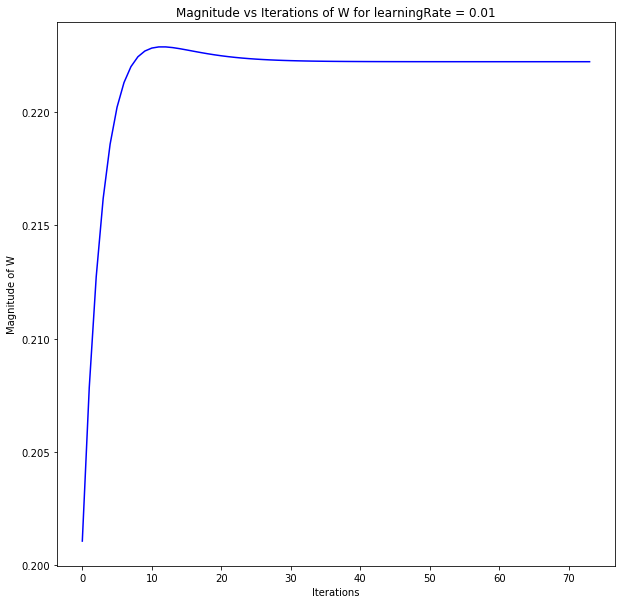

In [6]:
print "Initial W0:", x, "Initial W1: ", y;
iterations = range(len(w0_list));
fig, ax = plt.subplots(figsize=(10,10));
ax.plot(iterations,w_magnitude_list,c = 'blue');
plt.title('Magnitude vs Iterations of W for learningRate = 0.01');
plt.ylabel('Magnitude of W');
plt.xlabel('Iterations');
plt.show();

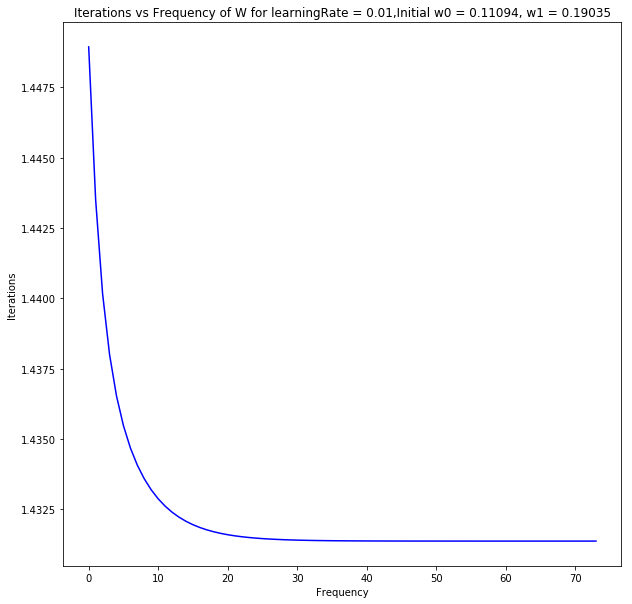

In [7]:
iterations = range(len(w0_list));
fig, ax = plt.subplots(figsize=(10,10));
ax.plot(iterations,frequency_list, c = 'blue');
plt.title('Iterations vs Frequency of W for learningRate = 0.01,Initial w0 = 0.11094, w1 = 0.19035');
plt.ylabel('Iterations');
plt.xlabel('Frequency');
plt.show();

In [8]:
#Newton's Method:
y = numpy.random.uniform(0,0.5);
x = numpy.random.uniform(0,0.5);
learningRate = 1;
w0_list = [];
w1_list = [];
w_magnitude_list = [];
frequency_list = [];
w = numpy.array([x,y]);
magnitude_w = (w[0]*w[0]) + (w[1]*w[1]);
w.resize(2,1);
count = 0;
while (magnitude_w > 0.01):
    element1 = (1/math.pow(1 - w[0] - w[1],2)) + (1/math.pow(w[0],2));
    element2 = (1/math.pow(1 - w[0] - w[1],2));
    element3 = (1/math.pow(1 - w[0] - w[1],2));
    element4 = (1/math.pow(1 - w[0] - w[1],2)) + (1/math.pow(w[1],2));
    hessian_matrix = numpy.array([[element1,element2],[element3,element4]]);
    hessian_inverse = numpy.linalg.inv(hessian_matrix);
    hessian_inverse.resize(2,2);
    
    row1 = ((1/(1 - w[0] - w[1])) - (1/w[0]));
    row2 = ((1/(1 - w[0] - w[1])) - (1/w[1]));
    gradient = numpy.array([row1,row2]);
    gradient.resize(2,1);
    
    w = w - learningRate * numpy.matmul(hessian_inverse,gradient);
    getFrequencies(w[0],w[1],frequency_list);
    if((w[0]) < 0 or (w[1]) < 0 or (w[0] + w[1]) > 1):
        break;
    else:
        w0_list.append(w[0]);
        w1_list.append(w[1]);    
    magnitude_w = (w[0]*w[0]) + (w[1]*w[1]);
    w_magnitude_list.extend(magnitude_w);
    if checkConvergence(w_magnitude_list) == True:
        break;

Initial W0: 0.142099585954 Initial W1:  0.0308042398136


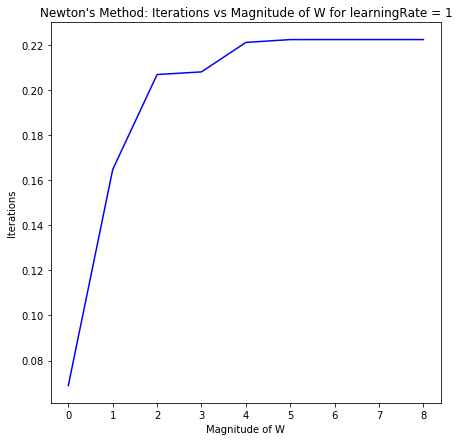

In [9]:
print "Initial W0:", x, "Initial W1: ", y;
iterations = range(len(w0_list));
fig, ax = plt.subplots(figsize=(7,7));
ax.plot(iterations,w_magnitude_list, c = 'blue');
plt.title("Newton's Method: Iterations vs Magnitude of W for learningRate = 1");
plt.ylabel('Iterations');
plt.xlabel('Magnitude of W');
plt.show();

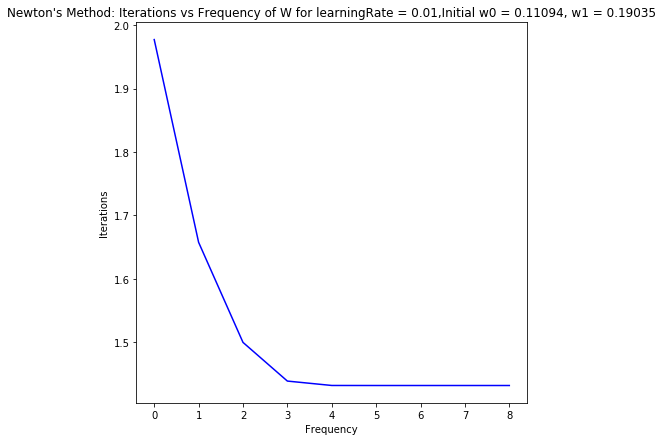

In [10]:
iterations = range(len(w0_list));
fig, ax = plt.subplots(figsize=(7,7));
ax.plot(iterations,frequency_list, c = 'blue');
plt.title("Newton's Method: Iterations vs Frequency of W for learningRate = 0.01,Initial w0 = 0.11094, w1 = 0.19035");
plt.ylabel("Iterations");
plt.xlabel("Frequency");
plt.show();